In [1]:
import os
import sys
import pickle

import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

import lof

In [2]:
f = open('normal_log.txt', 'r')
normal_stats = [[int(x) for x in line.split()] for line in f.readlines()]
normal_stats = np.array(normal_stats)

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normal_stats = scaler.fit_transform(normal_stats)

/home/hqythu/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [4]:
clf = lof.LocalOutlierFactor()
clf.fit(normal_stats)

LocalOutlierFactor(algorithm='auto', contamination=0.1, leaf_size=30,
          metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=20,
          p=2)

In [5]:
f = open('abnormal_log.txt', 'r')
abnormal_stats = [[int(x) for x in line.split()] for line in f.readlines()]
abnormal_stats = np.array(abnormal_stats)
abnormal_stats = scaler.transform(abnormal_stats)

/home/hqythu/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [6]:
test_stats = np.concatenate([normal_stats[-len(abnormal_stats):], abnormal_stats], axis=0)
test_label = np.concatenate([np.zeros(len(abnormal_stats)), np.ones(len(abnormal_stats))], axis=0)

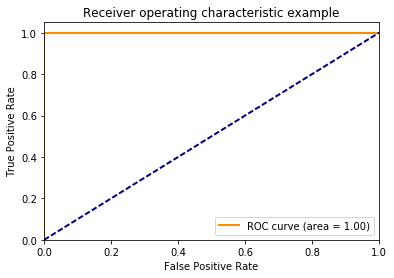

In [7]:
from sklearn import metrics
scores = clf._decision_function(test_stats)
fpr, tpr, thresholds = metrics.roc_curve(test_label, scores, pos_label=0)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [8]:
pickle.dump(clf, open('lof.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))